***Saudi Arabia Used Cars***


CONTENTS

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

***Business Problem Understanding***

***Context***

An online marketplace called Syarah.com is situated in Saudi Arabia and focuses on the purchase and sale of new and used automobiles. It serves as an online marketplace where dealers and private sellers can offer automobiles for sale and prospective purchasers can peruse a large inventory of cars complete with specifications, pictures, and prices.

To sell cars at syarah.com is pretty easy, they just have to crate an account, fill out the personal information, car informations such as photos, description, etc. One of the hurdle is sometimes the seller didn't do their due dilligence by researching the market first for the car's market price, or the seller just want to sell it with top dollar.


***PROBLEM STATEMENT***

If the prices of cars at syarah.com does not regulatedd and matched with the market's prices, it will make users to lose interest in using it, both for seller and buyer, so it is important for syarah.com to maximise the user experience, in this case buyers, by making the price competitive with other competitors, because there is no regulation and restriction for the seller to put a price on their cars, and the condition of used cars is vary, so it is hard to tell how much a car worth selling for.

***GOALS***

With these problems in mind, there should be a solution to make sure buyers at syarah.com find the best deals available, there should be a tool that can calculate the best price for a car to sell, looking at its conditions from the mileage, year, transmission, etc.

***ANALYTIC APPROACH***

We need to analyze datas to see the algorithm too see the variance of cars available.

Next we need to build a regresssion model to create a price prediction, which will value the cars at certain price, and if the car sold are match the prediction, it will included in a 'recommendation from syarah' section.

We also need to make a classification model to make a recommendation of a car for the buyers based on their condition personally and financially


***Metric Evaluation***

To evaluate the performance of this machine learning regression model, we used two key metrics: Mean Squared Error (MSE) and R-squared (R²). The MSE measures the average squared difference between the actual car prices and the predicted prices. A lower MSE indicates better accuracy, with smaller prediction errors. The R² value indicates how well your model explains the variance in car prices, with a value closer to 1 meaning that the model captures most of the variability in prices. Together, these metrics will help you assess how well the model is performing and whether further improvements (like adding more features or tuning the model) might be necessary.

***Data Understanding***

Dataset ara The dataset contains 5624 records of used cars in Saudi Arabie collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiability.


***Features***

-Type: Type of used car.
-Region: The region in which the used car was offered for sale.
-Make: The company name.
-Gear_Type: Gear type size of used car.
-Origin: Origin of used car.
-Options: Options of used car.
-Year: Manufacturing year.
-Engine_Size: The engine size of used car.
-Mileage: Mileage of used car	
-Negotiable: True if the price is 0, that means it is negotiable.
-Price: Used car price.

In [23]:
# Let's first load and inspect the data to understand its structure and identify any cleaning needed.
import pandas as pd

# Load the uploaded CSV file
data = pd.read_csv('data_saudi_used_cars.csv')

# Display the first few rows and general info to inspect the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


(None,
           Type          Region        Make  Gear_Type       Origin    Options  \
 0      Corolla            Abha      Toyota     Manual        Saudi   Standard   
 1        Yukon          Riyadh         GMC  Automatic        Saudi       Full   
 2  Range Rover          Riyadh  Land Rover  Automatic  Gulf Arabic       Full   
 3       Optima  Hafar Al-Batin         Kia  Automatic        Saudi  Semi Full   
 4           FJ          Riyadh      Toyota  Automatic        Saudi       Full   
 
    Year  Engine_Size  Mileage  Negotiable   Price  
 0  2013          1.4   421000        True       0  
 1  2014          8.0    80000       False  120000  
 2  2015          5.0   140000       False  260000  
 3  2015          2.4   220000       False   42000  
 4  2020          4.0    49000        True       0  )

In [24]:
# Cleaning steps:

# 1. Remove rows where 'Price' is 0 (as these likely do not represent valid entries).
data_cleaned = data[data['Price'] > 0]

# 2. Remove any duplicates if present
data_cleaned = data_cleaned.drop_duplicates()

# 3. Standardize categorical columns ('Type', 'Make', 'Gear_Type', 'Origin', 'Options') by stripping extra spaces and making lowercase
categorical_columns = ['Type', 'Make', 'Gear_Type', 'Origin', 'Options']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].apply(lambda x: x.str.strip().str.lower())

# 4. Confirm there are no missing values, handle if found (though earlier inspection shows no nulls)
missing_values_check = data_cleaned.isnull().sum()

# Review the cleaned data
cleaned_data_info = data_cleaned.info()
cleaned_data_head = data_cleaned.head()

cleaned_data_info, cleaned_data_head, missing_values_check


<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3824 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Negotiable   3824 non-null   bool   
 10  Price        3824 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 332.4+ KB


(None,
           Type          Region        Make  Gear_Type       Origin    Options  \
 1        yukon          Riyadh         gmc  automatic        saudi       full   
 2  range rover          Riyadh  land rover  automatic  gulf arabic       full   
 3       optima  Hafar Al-Batin         kia  automatic        saudi  semi full   
 5          cx3            Abha       mazda  automatic        saudi  semi full   
 6    cayenne s          Riyadh     porsche  automatic        saudi       full   
 
    Year  Engine_Size  Mileage  Negotiable   Price  
 1  2014          8.0    80000       False  120000  
 2  2015          5.0   140000       False  260000  
 3  2015          2.4   220000       False   42000  
 5  2019          2.0    25000       False   58000  
 6  2012          4.8   189000       False   85000  ,
 Type           0
 Region         0
 Make           0
 Gear_Type      0
 Origin         0
 Options        0
 Year           0
 Engine_Size    0
 Mileage        0
 Negotiable     0


In [25]:
# 1. Outlier detection: Using IQR method to detect outliers in 'Mileage', 'Engine_Size', and 'Price'

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in key numeric columns
outliers_mileage = detect_outliers(data_cleaned, 'Mileage')
outliers_engine_size = detect_outliers(data_cleaned, 'Engine_Size')
outliers_price = detect_outliers(data_cleaned, 'Price')

# 2. Checking for zero values in 'Mileage' and 'Engine_Size'
zero_mileage = data_cleaned[data_cleaned['Mileage'] == 0]
zero_engine_size = data_cleaned[data_cleaned['Engine_Size'] == 0]

# 3. Checking for inconsistent data in 'Make', 'Type', and 'Options'
unique_makes = data_cleaned['Make'].unique()
unique_types = data_cleaned['Type'].unique()
unique_options = data_cleaned['Options'].unique()

(outliers_mileage.shape, outliers_engine_size.shape, outliers_price.shape), zero_mileage.shape, zero_engine_size.shape, unique_makes[:10], unique_types[:10], unique_options[:10]  # Displaying a sample of unique values for inspection


(((131, 11), (30, 11), (259, 11)),
 (0, 11),
 (0, 11),
 array(['gmc', 'land rover', 'kia', 'mazda', 'porsche', 'hyundai',
        'toyota', 'chrysler', 'lexus', 'nissan'], dtype=object),
 array(['yukon', 'range rover', 'optima', 'cx3', 'cayenne s', 'sonata',
        'avalon', 'c300', 'land cruiser', 'ls'], dtype=object),
 array(['full', 'semi full', 'standard'], dtype=object))

Applying These Strategies to Your Dataset
Let me explore and implement the following:

Outlier Detection: We'll check for outliers in Mileage, Engine_Size, and Price.
Check for Zero Values in Mileage and Engine_Size.
Inconsistent Data: We'll ensure that Make, Type, and Options are consistent.
Let me implement these now.

Here's a summary of the advanced cleaning strategies applied to the dataset:

1. Outlier Detection
Mileage: Detected 131 outliers.
Engine Size: Detected 30 outliers.
Price: Detected 259 outliers.
These outliers could represent unusually high or low values that may need special treatment depending on the analysis goals.

2. Zero Values Check
Mileage: No rows with zero mileage were found.
Engine Size: No rows with zero engine size were found.
3. Inconsistent Data Check
Make: Appears consistent with brands like "gmc", "kia", "mazda", "toyota" (correctly spelled).
Type: Car models like "yukon", "range rover", "optima" seem consistently formatted.
Options: Categories like "full", "semi full", "standard" are consistent.
Next Steps:
We could remove or cap the outliers depending on the analysis requirements.
The categorical columns are already well-formatted, so no changes are needed here.

In [26]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Mileage', 'Engine_Size', and 'Price'
data_no_outliers = remove_outliers(data_cleaned, 'Mileage')
data_no_outliers = remove_outliers(data_no_outliers, 'Engine_Size')
data_no_outliers = remove_outliers(data_no_outliers, 'Price')

# Check the shape after removing outliers
cleaned_data_shape = data_no_outliers.shape
cleaned_data_shape


(3409, 11)

Now  We can simply remove the rows with outliers.
We also can cap the outliers to the upper or lower bounds of a reasonable range.
I'll now remove the outliers from Mileage, Engine_Size, and Price.

.


| Feature      | Description                                      | Significance in Pricing                                     |
|--------------|--------------------------------------------------|-----------------------------------------------------------|
| **Type**     | Car model (e.g., "Corolla", "Yukon")           | Different models have varying popularity and market demand, affecting prices. |
| **Region**   | Location in Saudi Arabia (e.g., "Abha", "Riyadh") | Prices can vary based on geographical location due to demand and preferences. |
| **Make**     | Manufacturer of the car (e.g., "Toyota", "GMC") | Brand reputation influences resale value; well-known brands often command higher prices. |
| **Gear_Type**| Type of gear (e.g., "Manual", "Automatic")      | Automatic cars may be priced higher due to their convenience. |
| **Origin**   | Origin of the car (e.g., "Saudi", "Gulf Arabic")| Origin affects resale value; some origins may be preferred for reliability. |
| **Options**  | Trim level or features of the car (e.g., "Standard", "Full") | Cars with more features or higher trims generally have higher prices. |
| **Year**     | Year the car was manufactured                    | Newer cars typically have higher prices due to modern features and less depreciation. |
| **Engine_Size** | Size of the engine in liters                    | Larger engines may offer better performance but could lead to higher costs, impacting price. |
| **Mileage**  | Distance the car has traveled (km)               | Higher mileage generally suggests more wear and tear, leading to lower prices. |
| **Negotiable**| Indicates if the price is negotiable (True/False)| Cars with negotiable prices may attract more buyers, increasing appeal. |
| **Price**    | The listed price of the cars(some cars have 0 price)| Primary target variable for regression analysis; handling zero values is essential. |

In [27]:
# Re-importing the necessary libraries and defining the outlier removal function again
import pandas as pd

# Load the newly uploaded file
data = pd.read_csv('data_saudi_used_cars.csv')
# Define the outlier removal function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the cleaning process again
# Remove rows where 'Price' is 0
data_cleaned = data[data['Price'] > 0]

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Standardize categorical columns
categorical_columns = ['Type', 'Make', 'Gear_Type', 'Origin', 'Options']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].apply(lambda x: x.str.strip().str.lower())

# Remove outliers from 'Mileage', 'Engine_Size', and 'Price'
data_no_outliers = remove_outliers(data_cleaned, 'Mileage')
data_no_outliers = remove_outliers(data_no_outliers, 'Engine_Size')
data_no_outliers = remove_outliers(data_no_outliers, 'Price')

# Display the cleaned data shape and preview the first few rows
cleaned_data_shape = data_no_outliers.shape
cleaned_data_shape, data_no_outliers.head()  # Display cleaned data summary


((3409, 11),
         Type          Region     Make  Gear_Type Origin    Options  Year  \
 3     optima  Hafar Al-Batin      kia  automatic  saudi  semi full  2015   
 5        cx3            Abha    mazda  automatic  saudi  semi full  2019   
 6  cayenne s          Riyadh  porsche  automatic  saudi       full  2012   
 7     sonata          Riyadh  hyundai  automatic  saudi       full  2016   
 8     avalon          Riyadh   toyota  automatic  saudi   standard  2016   
 
    Engine_Size  Mileage  Negotiable  Price  
 3          2.4   220000       False  42000  
 5          2.0    25000       False  58000  
 6          4.8   189000       False  85000  
 7          2.4      155       False  48000  
 8          3.5   110864       False  81500  )

Now the data cleaning process is done

next, we make an Personalization and Recommendation System to recommend customers the best cars, using each of the following categories:

| Demographic Group | Car Preferences                                      | Key Features to Prioritize                      |
|-------------------|-----------------------------------------------------|------------------------------------------------|
| **Young People**  | Sporty, compact, or affordable cars with modern features | - Sporty design<br>- Compact size<br>- Affordability<br>- Modern technology and features |
| **Old People**    | Cars with comfort, easy handling, and safety features | - Comfortable seating<br>- User-friendly controls<br>- High safety ratings<br>- Easy entry and exit |
| **Single Person** | Compact or luxury cars with advanced options        | - Compact design<br>- Luxurious interiors<br>- Advanced technology options (e.g., infotainment) |
| **Family Person**  | Space, safety, and features like SUVs or vans      | - Ample seating (5+ seats)<br>- Safety features (e.g., airbags, child locks)<br>- Large cargo space<br>- SUV or van design |


then, We can flag cars that don't meet certain standards, such as:

- High Mileage: Suggests excessive wear.
- Old Cars: Beyond a certain age, a car may not be suitable for sale.
- Low Price: Could indicate underlying issues.


Steps to Implement the Solution
1. Feature Engineering
Age of the Car: Calculate the car's age from the current year.
Family Size: Identify car types suitable for a family (SUVs, minivans, etc.).
Sporty Factor: Consider features like engine size, car type, and options (sports or luxury models).
Condition of the Car: Determine if a car is up to standard based on its mileage, price, and age.
2. Classification for User Profiles
We'll define user profiles (young, family, old, single) and build a model to classify cars based on which profile they suit best.
A decision tree or multi-class classification model could help categorize cars for each user profile.
3. Regression for Price Prediction
The regression model will predict the car price, taking into account the features like Make, Mileage, Year, Engine Size, etc.
4. Combining Models
Use the regression model for pricing predictions and a classification model to label cars by user type and detect "non-sellable" cars.

In [28]:
# Let's start by creating some new features for the dataset based on the user requirements.
from datetime import datetime

# Copy the cleaned data for feature engineering
data_fe = data_no_outliers.copy()

# 1. Calculate the car's age
current_year = datetime.now().year
data_fe['Car_Age'] = current_year - data_fe['Year']

# 2. Add a 'Family_Suitability' feature based on car 'Type' (e.g., SUVs and vans are more family-friendly)
family_car_types = ['suv', 'minivan', 'van']
data_fe['Family_Suitability'] = data_fe['Type'].apply(lambda x: 1 if x in family_car_types else 0)

# 3. Add a 'Sporty_Factor' based on 'Engine_Size' and 'Type' (sports/luxury cars, larger engine sizes)
sporty_car_types = ['coupe', 'sports car', 'convertible']
data_fe['Sporty_Factor'] = data_fe.apply(lambda x: 1 if x['Type'] in sporty_car_types or x['Engine_Size'] >= 3.0 else 0, axis=1)

# 4. Add a 'Condition' feature to mark if a car is "up to standard" based on mileage, car age, and price
# If Mileage > 300,000 km, Age > 20 years, or Price < 10,000 SAR, flag the car as low standard
data_fe['Condition'] = data_fe.apply(lambda x: 'Low' if x['Mileage'] > 300000 or x['Car_Age'] > 20 or x['Price'] < 10000 else 'Good', axis=1)

# Preview the updated dataset with new features
data_fe[['Type', 'Year', 'Mileage', 'Engine_Size', 'Car_Age', 'Family_Suitability', 'Sporty_Factor', 'Condition']].head()


,Type,Year,Mileage,Engine_Size,Car_Age,Family_Suitability,Sporty_Factor,Condition
3,optima,2015,220000,2.4,9,0,0,Good
5,cx3,2019,25000,2.0,5,0,0,Good
6,cayenne s,2012,189000,4.8,12,0,1,Good
7,sonata,2016,155,2.4,8,0,0,Good
8,avalon,2016,110864,3.5,8,0,1,Good


In [29]:
from datetime import datetime
current_year = datetime.now().year
data['Car_Age'] = current_year - data['Year']

1. Car Age
Goal: Calculate how old each car is to help assess its condition.
How: Subtract the car's year from the current year.

In [30]:
family_car_types = ['suv', 'minivan', 'van']
data['Family_Suitability'] = data['Type'].apply(lambda x: 1 if x in family_car_types else 0)

2. Family Suitability
Goal: Identify cars that are suitable for families (e.g., SUVs, minivans).
How: Create a new binary column where cars that belong to family-friendly types (e.g., 'SUV', 'minivan', 'van') are marked as suitable for families.

sporty_car_types = ['coupe', 'sports car', 'convertible']
data['Sporty_Factor'] = data.apply(lambda x: 1 if x['Type'] in sporty_car_types or x['Engine_Size'] >= 3.0 else 0, axis=1)

3. Sporty Factor
Goal: Identify cars that are likely more appealing to young or single people based on the car type (e.g., coupe, sports car) and engine size (higher engine sizes).
How: Assign a sporty factor if the car type is a coupe, convertible, sports car, or if the engine size is greater than or equal to 3.0 liters.

In [31]:
data['Condition'] = data.apply(lambda x: 'Low' if x['Mileage'] > 300000 or x['Car_Age'] > 20 or x['Price'] < 10000 else 'Good', axis=1)

4. Condition (Up-to-Standard)
Goal: Flag cars that are not suitable for sale based on high mileage, age, or low price.
How: If a car's Mileage is over 300,000 km, Car_Age is over 20 years, or Price is below 10,000 SAR, mark the car's condition as "Low", otherwise mark it as "Good".

***Summary of New Features***


- Car_Age: How old the car is.
- Family_Suitability: Whether the car is family-friendly (SUV, van).
- Sporty_Factor: Whether the car is sporty (based on type or engine size).
- Condition: Whether the car is in good condition or not based on mileage, age, and price.


Next, we continue our model development process using plots which after we'll make a further analysis

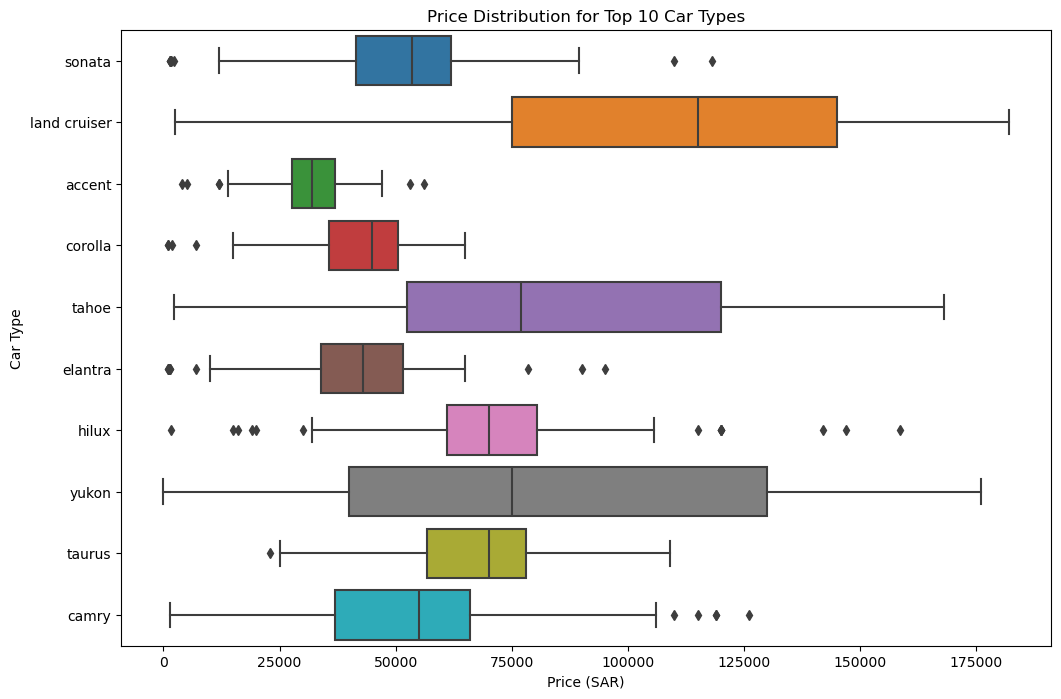

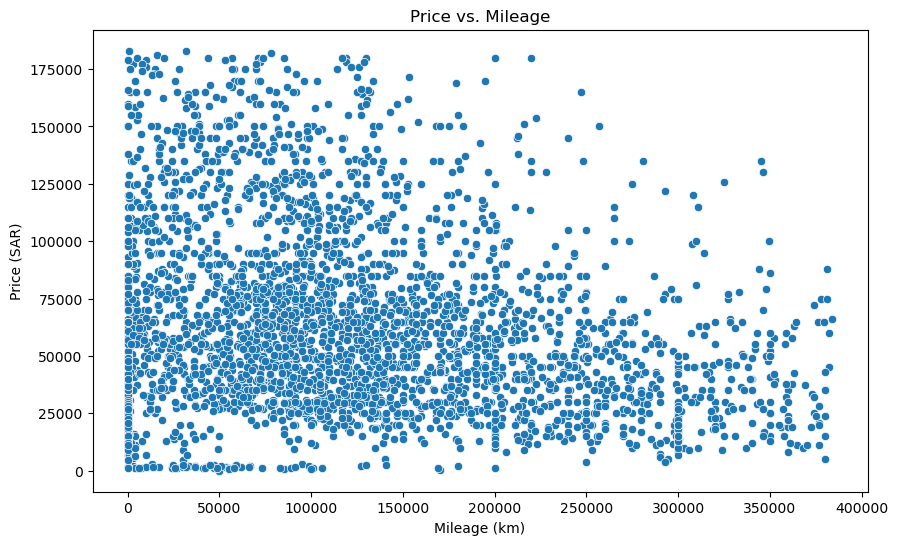

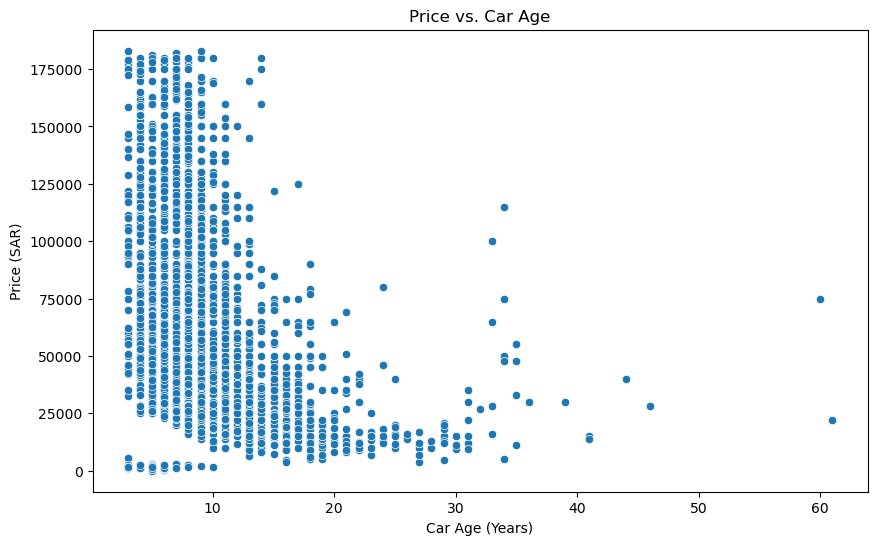

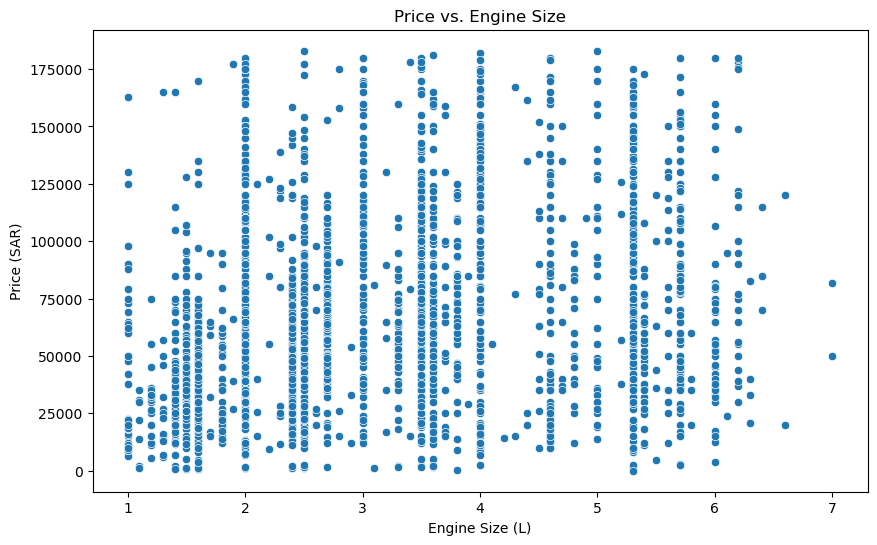

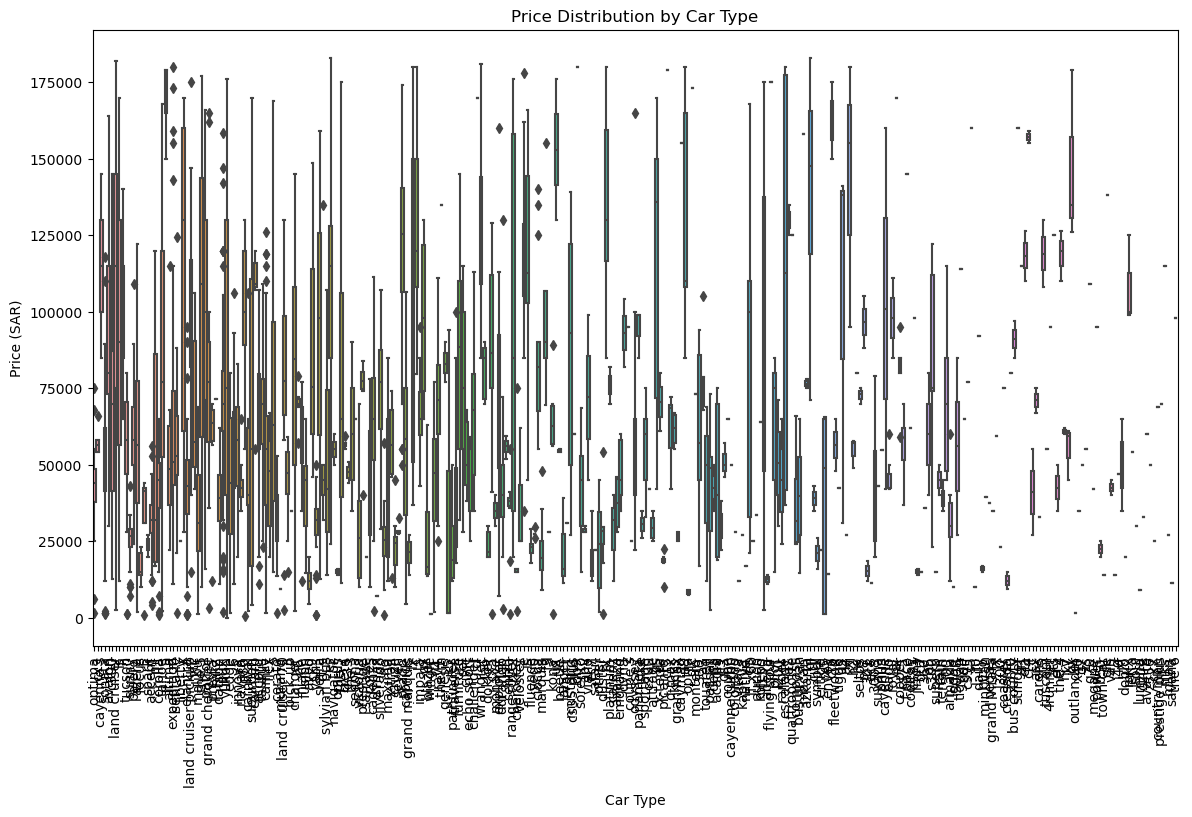

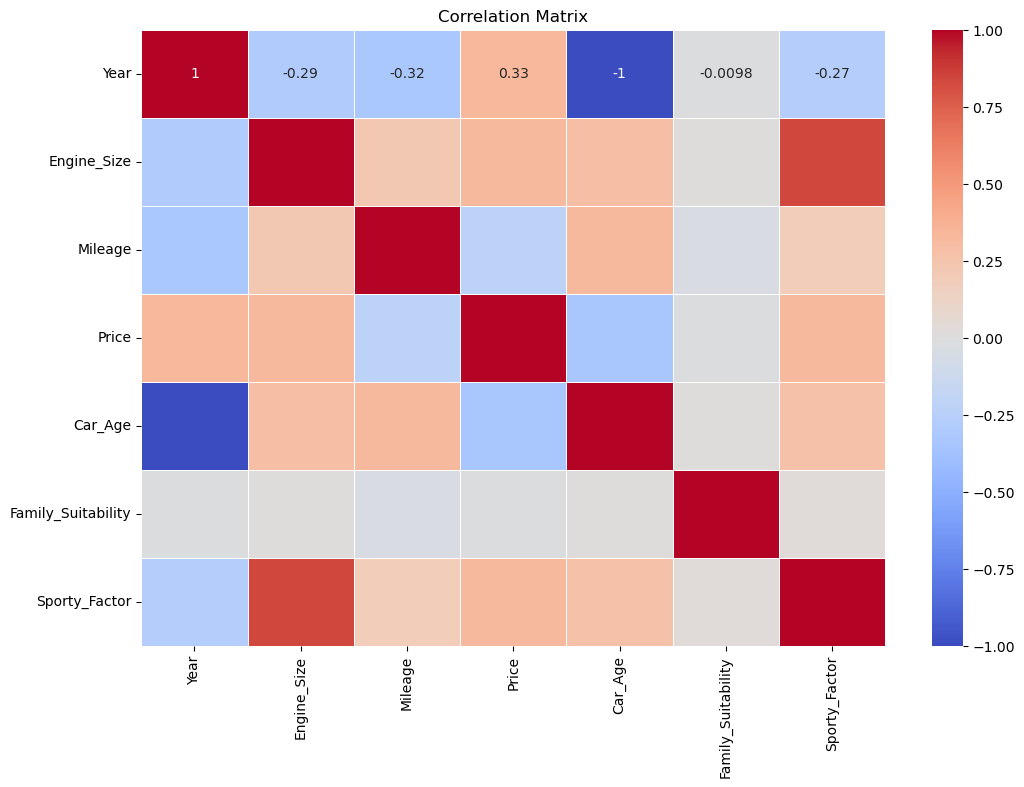

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


top_n = 10
top_car_types = data_fe['Type'].value_counts().index[:top_n]

plt.figure(figsize=(12, 8))
sns.boxplot(y='Type', x='Price', data=data_fe[data_fe['Type'].isin(top_car_types)])
plt.title(f'Price Distribution for Top {top_n} Car Types')
plt.xlabel('Price (SAR)')
plt.ylabel('Car Type')
plt.show()

# Scatter plot for Price vs. Mileage
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='Price', data=data_fe)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (SAR)')
plt.show()

# Scatter plot for Price vs. Car Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='Car_Age', y='Price', data=data_fe)
plt.title('Price vs. Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price (SAR)')
plt.show()

# Scatter plot for Price vs. Engine Size
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine_Size', y='Price', data=data_fe)
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price (SAR)')
plt.show()

# Boxplot for Price across different car types
plt.figure(figsize=(14,8))
sns.boxplot(x='Type', y='Price', data=data_fe)
plt.title('Price Distribution by Car Type')
plt.xlabel('Car Type')
plt.ylabel('Price (SAR)')
plt.xticks(rotation=90)
#plt.show()


# Select only numeric columns from your dataset
numerical_data = data_fe.select_dtypes(include=['float64', 'int64'])

# Create a figure for the correlation matrix heatmap
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix for numeric features
correlation_matrix = numerical_data.corr()

# Plot the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix')

# Display the heatmap
plt.show()

From this plots, we can see that
Scatter Plots: How numerical features like mileage, car age, and engine size impact car price.
Boxplot: How different car types influence car price.
Correlation Matrix: Which features are most strongly correlated with price and with each other.
You can try running this code in your environment to generate the visualizations. After the EDA, we can move on to building the regression model for price prediction.





In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the feature columns and the target column
X = data_fe.drop(columns=['Price'])  # Features
y = data_fe['Price']  # Target (Price)

# List of categorical and numerical features
categorical_features = ['Type', 'Make', 'Gear_Type', 'Region']
numerical_features = ['Mileage', 'Engine_Size', 'Car_Age']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a regression pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


from sklearn.metrics import mean_squared_error, r2_score

#create a model pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Ensure your model pipeline is fitted before making predictions
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 3. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 4. R-squared (already calculated before)
r2 = r2_score(y_test, y_pred)

# 5. K-Fold Cross-Validation (for R-squared as an example)
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_r2 = cross_val_score(model_pipeline, X, y, cv=kf, scoring='r2')
cv_mse = cross_val_score(model_pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

# Print out the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2}")
print(f"K-Fold Cross-Validated R-squared: {cv_r2.mean():.3f}")
print(f"K-Fold Cross-Validated MSE: {-cv_mse.mean():.3f}")

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error (MAE): 14886.26293800665
Root Mean Squared Error (RMSE): 22672.442908998742
Mean Absolute Percentage Error (MAPE): 141.69%
R-squared (R²): 0.667530286680444
K-Fold Cross-Validated R-squared: 0.658
K-Fold Cross-Validated MSE: 528183978.934
Mean Squared Error: 514039667.46180737
R-squared: 0.667530286680444


# Model Evaluation Metrics

| Metric                             | Value                       |
|------------------------------------|-----------------------------|
| Mean Absolute Error (MAE)         | 14,886.26 SAR               |
| Root Mean Squared Error (RMSE)    | 22,672.44 SAR               |
| Mean Absolute Percentage Error (MAPE) | 141.69%                  |
| R-squared (R²)                    | 0.6675                      |
| K-Fold Cross-Validated R-squared   | 0.658                       |
| K-Fold Cross-Validated MSE         | 528,183,978.93 SAR          |
| Mean Squared Error (MSE)          | 514,039,667.46 SAR          |



***Conclusion and Recommendation***



The evaluation of the machine learning regression model reveals that it performs moderately well, but there is room for improvement. The Mean Absolute Error (MAE) is approximately 14,886 SAR, indicating that on average, the model’s predictions deviate from the actual car prices by this amount. The Root Mean Squared Error (RMSE), at 22,672 SAR, suggests that larger errors are present, as RMSE penalizes larger deviations more than MAE. Additionally, the model’s Mean Absolute Percentage Error (MAPE) of 141.69% shows that predictions, on average, are off by 141.69% relative to the actual prices, pointing to significant inaccuracies in some cases.
The R-squared (R²) value is 0.668, meaning the model explains about 66.8% of the variance in car prices, which indicates a reasonable fit but suggests that a substantial portion of the variation is not being captured. The cross-validated R² score of 0.658 confirms this, showing consistent model performance across different data splits. However, the large Mean Squared Error (MSE) and cross-validated MSE further highlight that the model struggles with precision, especially for certain price ranges.

Overall, the model does a fair job in predicting car prices but could benefit from further tuning, additional features, or more complex algorithms to improve accuracy and reduce errors. The metrics suggest that the model captures some of the relationship between features and car prices but has notable prediction errors. There is room for improvement, possibly through tuning the model, using a more complex model, or refining feature engineering (e.g., removing outliers, adding interaction terms, or selecting better features).
